In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [5]:
df = pd.read_csv("bank.csv")

print("Shape:", df.shape)
display(df.head())
display(df.describe())
display(df['deposit'].value_counts())


Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


,count
deposit,
no,5873
yes,5289


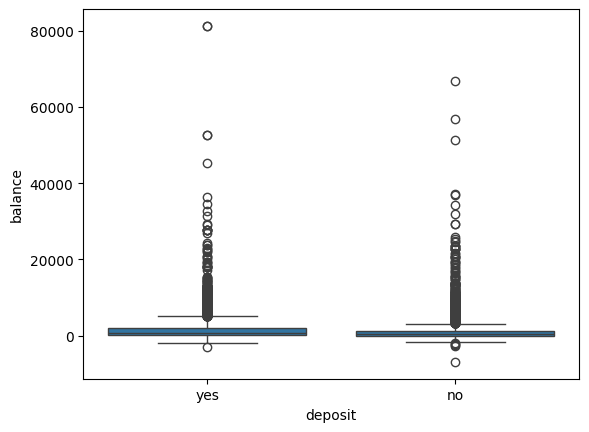

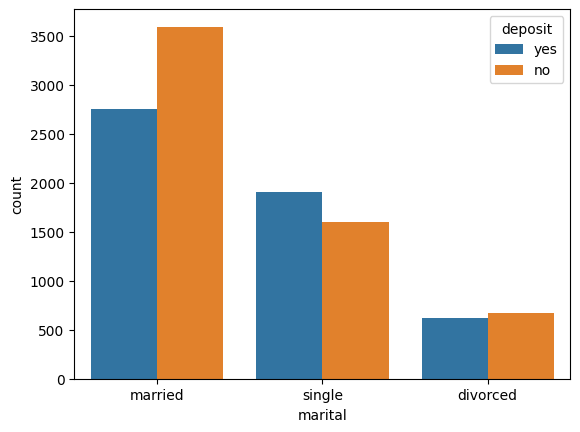

In [6]:
sns.boxplot(x="deposit", y="balance", data=df)
plt.show()

sns.countplot(x="marital", hue="deposit", data=df)
plt.show()


**Key Insights**
- Higher balance customers subscribe more often  
- Singles show higher subscription rate  
- Previous campaign success strongly predicts subscription


In [7]:
df['deposit'] = df['deposit'].map({'yes':1,'no':0})

df_encoded = pd.get_dummies(df, drop_first=True)

# remove data leakage
df_encoded = df_encoded.drop('duration', axis=1)

X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=50, random_state=42)

In [10]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("LOGISTIC REGRESSION")
print(classification_report(y_test, log_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

print("\nRANDOM FOREST")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1166
           1       0.76      0.60      0.67      1067

    accuracy                           0.72      2233
   macro avg       0.73      0.71      0.71      2233
weighted avg       0.73      0.72      0.72      2233

ROC-AUC: 0.7702034044892703

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1166
           1       0.76      0.63      0.69      1067

    accuracy                           0.73      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.73      0.73      2233

ROC-AUC: 0.7809045254404311


In [11]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("Top Important Features:")
display(feature_importance.head(10))

# fairness check example
married_rate = df[df['marital']=="married"]['deposit'].mean()
single_rate = df[df['marital']=="single"]['deposit'].mean()

print("Single vs Married ratio:", single_rate / married_rate)


Top Important Features:


,0
balance,0.161717
age,0.145033
day,0.123527
campaign,0.068025
pdays,0.047618
poutcome_success,0.039209
contact_unknown,0.039010
housing_yes,0.027046
previous,0.024554
education_secondary,0.018102


Single vs Married ratio: 1.2528889021872478
